# Import Libraries

In [1]:
import pandas as pd

from utils import clean_text
from constants import TRAIN_VAL_DATA_PATH, TEST_DATA_PATH, TRAIN_VAL_DATA_PATH, CLEANED_TEST_DATA_PATH

c:\internship\embeddings\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Prepare Data

## Load Data

In [2]:
df_test = pd.read_csv(".." / TEST_DATA_PATH)
df_test.head(5)

,Item_Name,class,Brand,Weight,Number of units,Size of units,Price,T.Price,Pack,Unit
0,Americana Okra zero 400 gm,Vegetables & Fruits,Americana,400gm,1,NaN,NaN,NaN,كيس,gm
1,ليمون اداليا 500 جم,"Tins, Jars & Packets",NaN,500جم,1,NaN,NaN,NaN,علبة,جم
2,صلصه هاينز برطمان خصم عرض,"Tins, Jars & Packets",هاينز,NaN,1,NaN,NaN,NaN,علبة,NaN
3,Dasani water 330ML,Water,Dasani,330مل,1,NaN,NaN,NaN,زجاجة,مل
4,بودرة عصير أناناس من سورس، 900 جم,Soft Drinks & Juices,سورس,900جم,1,NaN,NaN,NaN,عبوة,جم


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item_Name        4773 non-null   object 
 1   class            4772 non-null   object 
 2   Brand            3827 non-null   object 
 3   Weight           3022 non-null   object 
 4   Number of units  4773 non-null   int64  
 5   Size of units    45 non-null     object 
 6   Price            278 non-null    float64
 7   T.Price          278 non-null    float64
 8   Pack             4604 non-null   object 
 9   Unit             3058 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 373.0+ KB


<Axes: xlabel='Size of units'>

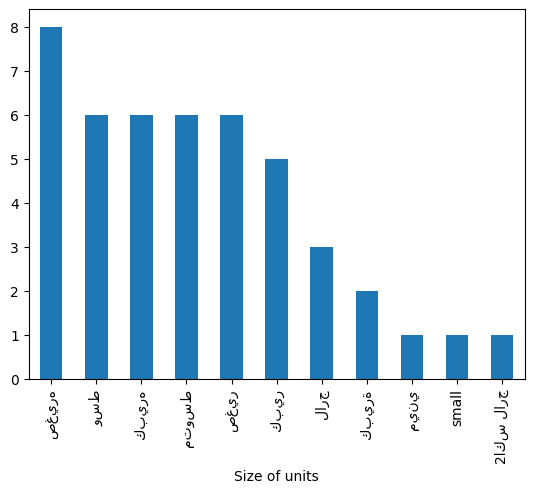

In [4]:
size_of_units = df_test[~df_test["Size of units"].isna()]["Size of units"].value_counts()

size_of_units.plot(kind="bar")

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item_Name        4773 non-null   object 
 1   class            4772 non-null   object 
 2   Brand            3827 non-null   object 
 3   Weight           3022 non-null   object 
 4   Number of units  4773 non-null   int64  
 5   Size of units    45 non-null     object 
 6   Price            278 non-null    float64
 7   T.Price          278 non-null    float64
 8   Pack             4604 non-null   object 
 9   Unit             3058 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 373.0+ KB


## Remove Nulls

In [6]:
df_test.dropna(subset=["Item_Name", "class"], inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4772 entries, 0 to 4772
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item_Name        4772 non-null   object 
 1   class            4772 non-null   object 
 2   Brand            3826 non-null   object 
 3   Weight           3021 non-null   object 
 4   Number of units  4772 non-null   int64  
 5   Size of units    45 non-null     object 
 6   Price            278 non-null    float64
 7   T.Price          278 non-null    float64
 8   Pack             4603 non-null   object 
 9   Unit             3057 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 410.1+ KB


## Normalize Data

In [7]:
df_test["Item_Name"] = df_test["Item_Name"].str.lower()
df_test["class"] = df_test["class"].str.lower()
df_test["Unit"] = df_test["Unit"].str.lower()
df_test["Weight"] = df_test["Weight"].str.lower()

## Clean Data

In [8]:
df_test["cleaned_item_name"] = df_test.apply(clean_text, axis=1)
df_test

,Item_Name,class,Brand,Weight,Number of units,Size of units,Price,T.Price,Pack,Unit,cleaned_item_name
0,americana okra zero 400 gm,vegetables & fruits,Americana,400gm,1,NaN,NaN,NaN,كيس,gm,americana okra zero
1,ليمون اداليا 500 جم,"tins, jars & packets",NaN,500جم,1,NaN,NaN,NaN,علبة,جم,ليمون اداليا
2,صلصه هاينز برطمان خصم عرض,"tins, jars & packets",هاينز,NaN,1,NaN,NaN,NaN,علبة,NaN,صلصه هاينز برطمان خصم عرض
3,dasani water 330ml,water,Dasani,330مل,1,NaN,NaN,NaN,زجاجة,مل,dasani water
4,بودرة عصير أناناس من سورس، 900 جم,soft drinks & juices,سورس,900جم,1,NaN,NaN,NaN,عبوة,جم,بودرة عصير أناناس من سورس
...,...,...,...,...,...,...,...,...,...,...,...
4768,جهينه كوكتيل 1ل,soft drinks & juices,جهينه,1ل,1,NaN,NaN,NaN,زجاجة,ل,جهينه كوكتي
4769,دبل ديرى مشروب بنكهه ليمون 275مل,soft drinks & juices,دبل ديرى,275مل,1,NaN,NaN,NaN,زجاجة,مل,دبل ديرى مشروب بنكهه ليمون
4770,galaxy smooth milk chocolate 24 x 36g,"chocolates, sweets & desserts",Galaxy,36جم,24,NaN,NaN,NaN,عبوة,جم,galaxy smooth milk chocolate x
4771,hot ketchup squeeze – 320g,"sauces, dressings & condiments",NaN,320g,1,NaN,NaN,NaN,عبوة,g,hot ketchup squeeze


## Save Cleaned Data

In [9]:
df_test.drop_duplicates(subset=["Item_Name"], inplace=True)
df_test.drop(columns=["Brand", "Weight", "Number of units", "Size of units", "Price", "T.Price", "Pack", "Unit"], inplace=True)

In [11]:
df_test = df_test[~(df_test["cleaned_item_name"]=="")]

In [12]:
df_test.to_csv(".." / CLEANED_TEST_DATA_PATH, index=False, encoding="utf-8-sig")